In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

قسمت الف

In [2]:
df_data = pd.read_csv("data.csv")

In [3]:
data_train = df_data.to_numpy()
x = data_train[:,0]
y = data_train[:,1]

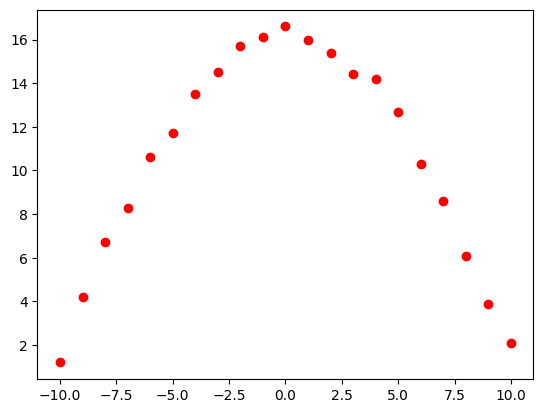

In [4]:
plt.scatter(x,y,color='red')
plt.show()

قسمت ب

In [5]:
def probability(x,a,mu,sig):
  return a * np.exp(-(x - mu)**2) / (2 * (sig**2))

In [6]:
def cosinus(xi,a,b):
  return a * np.cos(xi * b)

In [7]:
def MSE_function(h,y,m):
  return (1 / (2 * m) ) * sum(np.square(h - y))

قسمت ج

In [8]:
a = 8
mu = 0.8
sig = 0.25
y_pred = np.zeros((x.shape[0]))

In [9]:
for i,xi in enumerate(x):
  y_pred[i] = probability(xi,a,mu,sig)

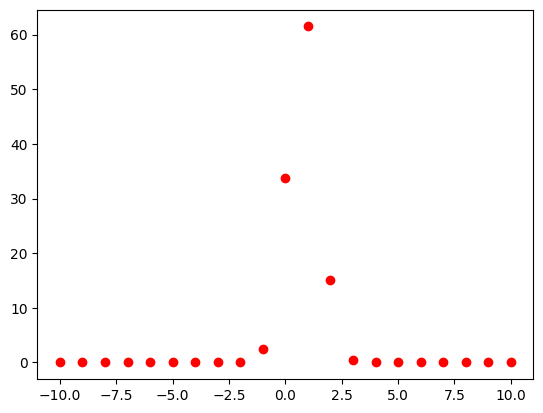

In [10]:
plt.scatter(x,y_pred,color='red')
plt.show()

In [11]:
MSE_function(h=y_pred,y=y,m=y_pred.shape[0])

103.84125083587772

قسمت د

103.84125083587772


c:\Users\matin\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


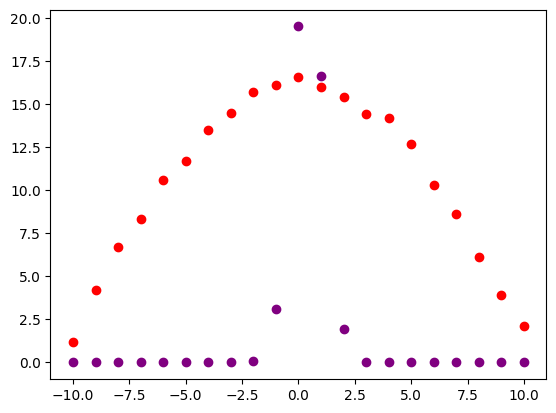

In [12]:
values, _ = curve_fit(probability, x, y)
curve_y = np.zeros((x.shape[0]))
for i,xi in enumerate(x):
  curve_y[i] = probability(xi, values[0], values[1], values[2])

print(MSE_function(h=y_pred,y=y,m=y_pred.shape[0]))
plt.scatter(x,curve_y,color='purple')
plt.scatter(x,y,color='red')
plt.show()

قسمت ه

67.89379402072217


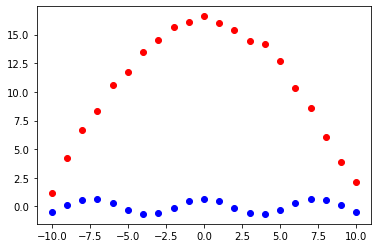

In [18]:
values, _ = curve_fit(cosinus, x, y)
curve_y_cos = np.zeros((x.shape[0]))
for i,xi in enumerate(x):
  curve_y_cos[i] = cosinus(xi, values[0], values[1])
print(MSE_function(h=curve_y_cos,y=y,m=curve_y_cos.shape[0]))
plt.scatter(x,curve_y_cos,color='blue')
plt.scatter(x,y,color='red')
plt.show()

قسمت و

0.04739886096260076


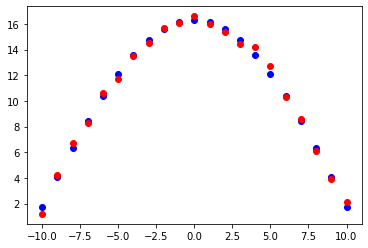

In [20]:
values, _= curve_fit(cosinus,x,y,p0=[2,0.1])

curve_y_cos = np.zeros((x.shape[0]))
for i,xi in enumerate(x):
  curve_y_cos[i] = cosinus(xi, values[0], values[1])
print(MSE_function(h=curve_y_cos,y=y,m=curve_y_cos.shape[0]))
plt.scatter(x,curve_y_cos,color='blue')
plt.scatter(x,y,color='red')
plt.show()